In [49]:
import numpy as np
import matplotlib.pyplot as plt

`gaussian_process.ipuynb` Chapter 2.1, Bayesian Neural Newtork (BNN) approximates Gaussian Process (GP) under certain conditions.


Notation: $\mathbf{x}=(x_1,x_2,...,x_i,...)$

The Bayesian Neural Network is defined by
$$
\begin{cases}
f_k(\mathbf{x})&=b_k+\displaystyle\sum_{j=1}^{H}v_{jk}\cdot h_j(\mathbf{x})\\
h_j(\mathbf{x})&=\text{tanh}\left(a_j+\displaystyle\sum_{i=1}^Iu_{ij}x_i\right)
\end{cases}, \text{where}
\begin{cases}
u_{ij}&\sim\mathcal{N}(0, \sigma_u^2)\\
a_j&\sim\mathcal{N}(0, \sigma_a^2)\\
v_{jk}&\sim\mathcal{N}(0, \sigma_v^2)\\
b_k&\sim\mathcal{N}(0, \sigma_b^2)
\end{cases}
$$
We show that BNN approaches GP as $H\rightarrow\infty$ by showing

1. $h_j(x^{(p)})$ are i.i.d. for all $j$ for a fixed $x^{(p)}$
2. $v_{jk}\cdot h_j(x^{(p)})$ are i.i.d. for all $j$ for a fixed $x^{(p)}$.
3. $\text{Var}\left[v_{jk}\cdot h_j(x^{(p)})\right]<\infty$ and thus CLT applies.

Fix input to $x^{(p)}$.
<ol><li>The intuitive explanation for this is because $u_{ij}$ and $a_j$ all come from independent Gaussians, so their transformation, $h_k(x^{(p)})$, are also independent. Of course this is not obvious so I provide a rigorous proof below.

> We start by providing some theorems below.
>> **_THEOREM 1.1:_**
Let $$X:\Omega\rightarrow\mathbb{R}^d\quad\text{and}\quad Y:\Omega\rightarrow\mathbb{R}^d$$  be independent random vectors, and let $$f:\mathbb{R^d}\rightarrow\mathbb{R}\quad\text{and}\quad g:\mathbb{R}^d\rightarrow\mathbb{R}$$ be measurable functions.<br>Then $f(X)$ and $g(Y)$ are independent.
>
> <sub><sub><i>*The proof of this theorem is omitted, but rather simple and follows proof in case $d=1$.</i></sub></sub><br>
>> **_THEOREM 1.3:_** A step function is measurable.
>
>> **_THEOREM 1.2:_** A continuous function is measurable.
> 
>Since $u_{ij}$ are independent, $u_{ij}\cdot x_i^{(p)}$ are independent. Therefore, their sums, $\displaystyle\sum_{i=1}^Iu_{ij}\cdot x^{(p)}_i$, are independent (take $f_j=\sum\quad\forall j$ in Theorem 1.1). It then follows that applying $\text{tanh}$ or $\text{step}$ function preserves independence (because they are both measurable functions), i.e., $h_j(x^{(p)})$ are independent.<br><sub><sub><i>*$a_j$ are ignored in this proof, but it can be incorporated by considering $a_j=u_{(i+1)j}$ and $x^{(p)}_{i+1}=1$, much like omission of bias term in neural network parameterization.</i></sub></sub><br>


> **_NOTE:_** In fact, $h_j(x^{(p)})$ are not necessarily i.i.d. if $u_{ij}$ are not i.i.d.. To see this, consider the case where $u_{\cdot 1}$ is from a Gaussian distribtion and $u_{\cdot 2}$ are from a Uniform distirbution. Then clearly $h_1(x^{(p)})$ and $h_2(x^{(p)})$ are not i.i.d..

</li>
<li>This follows from the fact that $h_j(x^{(p)})$ are i.i.d. and $v_{jk}$ are i.i.d..<br>First of all, it is clear that all $h_j(x^{(p)})$ and $v_{jk}$ are <i>mutually</i> independent, that is, $\{h_j(x^{(p)})\}_j\cup\{v_{jk}\}_{j}$ are all independent on each other.<br>
Now it follows that $\{(h_j(x^{(p)}), v_{jk})\}_j$ are independent from the following lemma by taking $E_j=(h_j(x^{(p)}), v_{jk})$.

>**_LEMMA:_**<br>
Let $A=\displaystyle\bigcup_{n}^\circ A_n$ and $E_1,E_2,...$ be disjoint subsets of $A$ such that $\displaystyle\bigcup_i^\circ E_i\subseteq A.$ <br>
If $A_n$ are independent, then $E_i$ are independent.

Using Theorem 1.1 by taking $f,g:\mathbb{R}^2\rightarrow\mathbb{R}$ as $f(x,y)=g(x,y)=xy$, $v_{1k}\cdot h_1(x^{(p)})$ and $v_{2k}\cdot h_2{x^{(p)}}$ are independent. Repeat this and get $v_{jk}\cdot h_j(x^{(p)})$ are all independent across $j$. It is also clear that they are identically distributed because they all follow the same transformation of random variables.
</li>
<li>

We show that $Var\left[v_{jk}h_j(x^{(p)})\right]<\infty$.

$$
\begin{align*}
\mathbb{E}\left[v_{jk}\cdot h_j(x^{(p)})\right]&=\mathbb{E}\left[v_{jk}\right]\mathbb{E}\left[{h_j(x^{(p)})}\right]\quad\text{by independence}\\
&=0\quad\cdots(1)\quad\because\mathbb{E}\left[v_{jk}\right]=0\\
\text{Var}\left[v_{jk}\cdot h_j(x^{(p)})\right]&=\mathbb{E}\left[\left(v_{jk}\cdot h_j(x^{(p)})\right)^2\right]-\mathbb{E}^2\left[v_{jk}\cdot h_j(x^{(p)})\right]\\
&=\mathbb{E}\left[v_{jk}^2\right]\mathbb{E}\left[h_j(x^{(p)})^2\right] - 0\quad\quad\text{by independence, and by (1)}\\
&=\sigma_v^2\:\mathbb{E}\left[h_j(x^{(p)})^2\right]<\infty
\end{align*}
$$
Therefore CLT applies and 
$$\lim_{H\to\infty}\displaystyle\sum_{j=1}^Hv_{jk}\cdot h_j(x^{(p)})\sim\mathcal{N}\left(0,H\sigma_v^2\:\mathbb{E}\left[h_j(x^{(p)})^2\right]\right)
$$
</li>
</ol>

# Bayesian Nural Network (BNN) approximates Gaussian Processes (GP) under certain condition.

Since the core of the approximation is based on Central Limit Theorem (CLT), the more neurons there are the better a BNN approximates GP.<br>
In the following case, we will use BNN with `tanh` and `step` activation to illustrate this.<br>

BNN with `tanh` activation approximates a special type of GP, Wiener Process.<br>
It turns out that in this case, the kernel is $$k(x_1,x_2)=min(x_1,x_2)$$ which is a type of a <i>non-stationary</i> kernel.<br>
As a result, GP here is non-stationary process, and it is a Wiener Process.

In [50]:
class BNN():
    def __init__(self, n_neurons, activation, sigma_a, sigma_u, sigma_b, omega_v):
        self.n_neurons = n_neurons
        self.activation = activation
        assert activation in ['tanh', 'step']
        self.sigma_a = sigma_a
        self.sigma_u = sigma_u
        self.sigma_b = sigma_b
        self.omega_v = omega_v
        self.init_weight()

    def init_weight(self):
        self.u = np.random.normal(loc=0, scale=self.sigma_u, size=(1, self.n_neurons))
        # self.a = np.random.normal(loc=0, scale=self.sigma_a, size=(1, self.n_neurons))
        self.a = np.random.uniform(low=-10, high=10, size=(1, self.n_neurons))
        self.v = np.random.normal(loc=0, scale=self.omega_v * np.sqrt(self.n_neurons) ** -1, size=(self.n_neurons,1))
        self.b = np.random.normal(loc=0, scale=self.sigma_b)

    def predict(self, xs):
        if self.activation == 'step':
            h = np.sign(np.matmul(xs, self.u) + self.a)# (N, d)
        elif self.activation == 'tanh':
            h = np.tanh(np.matmul(xs, self.u) + self.a)
        f = np.matmul(h, self.v) + self.b
        return f

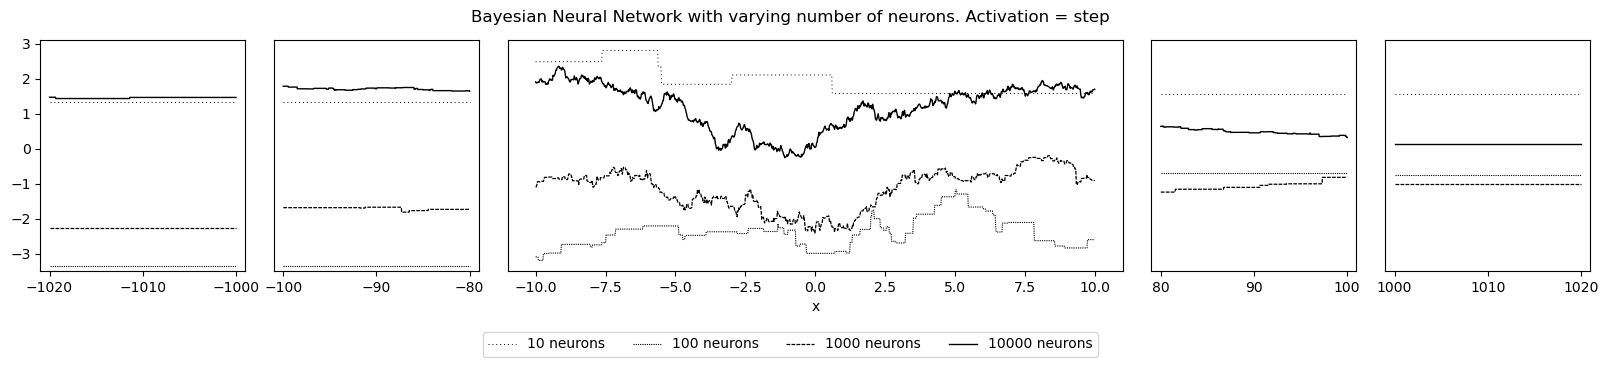

In [51]:
fig, axs = plt.subplots(1,5, figsize=(20,3), gridspec_kw=dict(width_ratios=(1,1,3,1,1), wspace=0.1))
linestyles = [(0, (1,3)), (0, (1,1)), (0, (3,1)), '-']
list_n_neurons = [10, 100, 1000, 10000]
lines = []
for i, n_neurons in enumerate(list_n_neurons):#, 100000):
    bnn = BNN(n_neurons=n_neurons, activation='step', sigma_u=1, sigma_a=1, sigma_b=1, omega_v=1)
    for ax, bound in zip(axs.flatten(), [(-1020,-1000), (-100,-80), (-10,10), (80, 100), (1000,1020)]):
        left, right = bound
        xs = np.linspace(left,right,1000).reshape(-1,1)
        f = bnn.predict(xs)
        lines.append(ax.plot(xs, f, linestyle=linestyles[i], c='k', linewidth=0.1 * i + 0.7))
for i, ax in enumerate(axs.flatten()):
    if i != 2:
        ax.set_ylim(axs[2].get_ylim())
    if i == 2:
        ax.set_xlabel('x')
    if i > 0:
        ax.set_yticks([])
fig.suptitle("Bayesian Neural Network with varying number of neurons. Activation = step")
fig.legend(handles=[l[0] for l in lines[::5]], labels=[f"{n} neurons" for n in list_n_neurons], loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2))

## Observation
The more neurons there are, the larger the distance from `x=0` such that the fuction becomes almost constant (ignoring noise).<br>
This is because the location of the `x` such that the step function changes its value is distributed as Cuachy distribtion.<br>

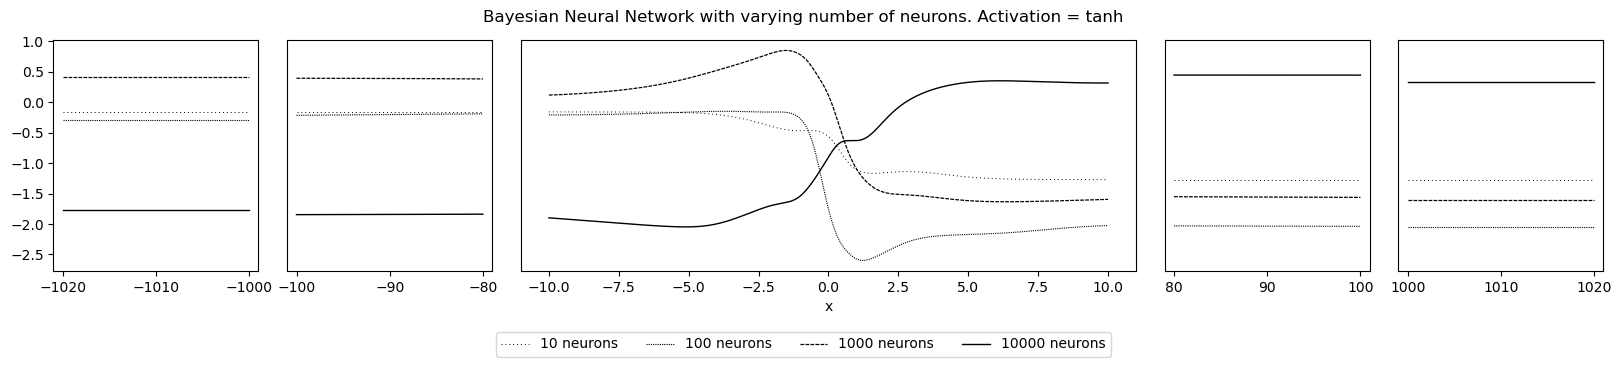

In [23]:
fig, axs = plt.subplots(1,5, figsize=(20,3), gridspec_kw=dict(width_ratios=(1,1,3,1,1), wspace=0.1))
linestyles = [(0, (1,3)), (0, (1,1)), (0, (3,1)), '-']
list_n_neurons = [10, 100, 1000, 10000]
lines = []
for i, n_neurons in enumerate(list_n_neurons):#, 100000):
    bnn = BNN(n_neurons=n_neurons, activation='tanh', sigma_u=1, sigma_a=1, sigma_b=1, omega_v=1)
    for ax, bound in zip(axs.flatten(), [(-1020,-1000), (-100,-80), (-10,10), (80, 100), (1000,1020)]):
        left, right = bound
        xs = np.linspace(left,right,1000).reshape(-1,1)
        f = bnn.predict(xs)
        lines.append(ax.plot(xs, f, linestyle=linestyles[i], c='k', linewidth=0.1 * i + 0.7))
for i, ax in enumerate(axs.flatten()):
    if i != 2:
        ax.set_ylim(axs[2].get_ylim())
    if i == 2:
        ax.set_xlabel('x')
    if i > 0:
        ax.set_yticks([])
fig.suptitle("Bayesian Neural Network with varying number of neurons. Activation = tanh")
fig.legend(handles=[l[0] for l in lines[::5]], labels=[f"{n} neurons" for n in list_n_neurons], loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2))

In [9]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

def predict(model, likelihood, test_x = torch.linspace(0, 1, 51)):
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Test points are regularly spaced along [0,1]
        return likelihood(model(test_x))

In [13]:
x1 = torch.rand(1,3)
x2 = torch.rand(1,4)

In [ ]:
x1.T.repeat(1, x2.shape[1])

tensor([[0.3683, 0.3683, 0.3683, 0.3683],
        [0.3188, 0.3188, 0.3188, 0.3188],
        [0.1782, 0.1782, 0.1782, 0.1782]])

In [25]:
x2.repeat(x1.shape[1], 1)

tensor([[0.1618, 0.2308, 0.9027, 0.0033],
        [0.1618, 0.2308, 0.9027, 0.0033],
        [0.1618, 0.2308, 0.9027, 0.0033]])

In [26]:
torch.minimum(x1.T.repeat(1, x2.shape[1]), x2.repeat(x1.shape[1], 1))

tensor([[0.1618, 0.2308, 0.3683, 0.0033],
        [0.1618, 0.2308, 0.3188, 0.0033],
        [0.1618, 0.1782, 0.1782, 0.0033]])

In [34]:
class MinKernel(gpytorch.kernels.Kernel):
    has_lengthscale = True

    # this is the kernel function
    def forward(self, x1, x2, **params):
        # apply lengthscale
        x1_ = x1.div(self.lengthscale)
        x2_ = x2.div(self.lengthscale)
        # return torch.minimum(x1.T.repeat(1, x2.shape[1]), x2.repeat(x1.shape[1], 1))
        return torch.minimum(x2.T.repeat(1, x1.shape[1]), x1.repeat(x2.shape[1], 1))
        
        
        # calculate the distance between inputs
        # diff = self.covar_dist(x1_, x2_, **params)
        # prevent divide by 0 errors
        # diff.where(diff == 0, torch.as_tensor(1e-20))
        # return sinc(diff) = sin(diff) / diff
        return torch.sin(diff).div(diff)

# Use the simplest form of GP model, exact inference
class SimpleSincGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = MinKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [40]:
# initialize the new model
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 1)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = SimpleSincGPModel(train_x, train_y, likelihood)

In [41]:
model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [42]:
observed_pred = predict(model, likelihood)

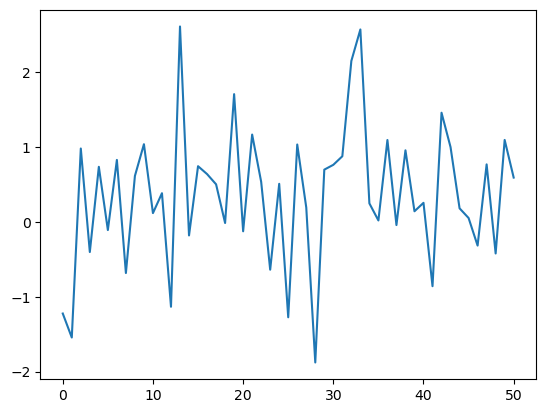

In [46]:
plt.plot(observed_pred.sample())

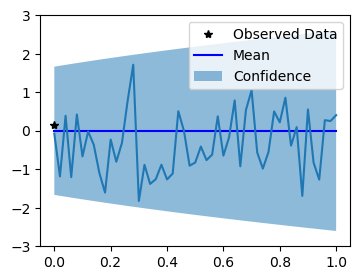

In [48]:
def plot(observed_pred, test_x=torch.linspace(0, 1, 51)):
    with torch.no_grad():
        # Initialize plot
        f, ax = plt.subplots(1, 1, figsize=(4, 3))

        # Get upper and lower confidence bounds
        lower, upper = observed_pred.confidence_region()
        # Plot training data as black stars
        ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
        # Plot predictive means as blue line
        ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
        # Shade between the lower and upper confidence bounds
        ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
        ax.set_ylim([-3, 3])
        ax.legend(['Observed Data', 'Mean', 'Confidence'])
        ax.plot(test_x, observed_pred.sample())
plot(observed_pred)